In [61]:
#Install the dependencies
#import quandl
#pip install virtualenv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
pd.set_option("display.max_column" ,None)
pd.set_option("display.max_column" ,None)

In [75]:
# Get the stock data
df1 = pd.read_csv(r"C:\Users\akshay.vilayatkar.vc\Downloads\05-12-2017-TO-04-12-2019YESBANKALLN.csv")

# Take a look at the data
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,YESBANK,EQ,05-Dec-2017,303.20,302.15,310.00,300.60,309.25,308.70,305.46,7558058,2.308717e+09,83051,3505426,46.38
1,YESBANK,EQ,06-Dec-2017,308.70,306.80,309.90,304.60,306.65,306.45,307.16,6114939,1.878270e+09,78923,3058747,50.02
2,YESBANK,EQ,07-Dec-2017,306.45,306.55,311.95,306.55,310.55,310.50,310.42,5794382,1.798682e+09,73536,2675152,46.17
3,YESBANK,EQ,08-Dec-2017,310.50,312.00,315.50,311.00,312.50,312.70,313.53,8434605,2.644496e+09,103648,4485317,53.18
4,YESBANK,EQ,11-Dec-2017,312.70,313.50,315.80,310.60,310.90,311.60,312.52,4416465,1.380248e+09,70439,2399909,54.34


I only need the Adjusted Close (Adj. Close) price, so I am getting data only from the column ‘Adj. Close’ and storing this back into the variable ‘df’.

In [63]:
# Get the Adjusted Close Price 
df = df[['Close Price']] 
# Take a look at the new data 
print(df.head())


   Close Price
0       308.70
1       306.45
2       310.50
3       312.70
4       311.60


In [64]:
df['Close Price'].describe

<bound method NDFrame.describe of 0      308.70
1      306.45
2      310.50
3      312.70
4      311.60
5      306.80
6      301.90
7      303.90
8      315.90
9      311.15
10     312.25
11     311.70
12     310.45
13     310.15
14     315.50
15     315.15
16     313.50
17     315.15
18     312.60
19     311.65
20     315.85
21     317.10
22     332.85
23     333.60
24     341.35
25     339.80
26     343.15
27     340.90
28     336.00
29     334.85
        ...  
462     51.20
463     48.30
464     52.15
465     54.75
466     58.15
467     56.80
468     70.40
469     66.60
470     66.15
471     68.30
472     68.70
473     66.45
474     68.95
475     73.00
476     68.20
477     68.75
478     68.70
479     65.85
480     64.15
481     65.85
482     64.25
483     64.80
484     63.75
485     63.15
486     68.25
487     70.05
488     68.30
489     64.05
490     59.50
491     63.00
Name: Close Price, Length: 492, dtype: float64>

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


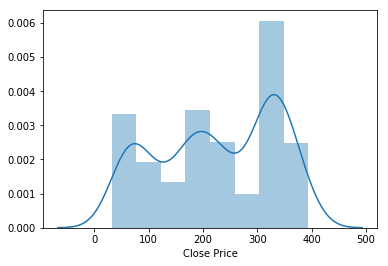

In [65]:
import seaborn as sns
sns.distplot(df['Close Price'])

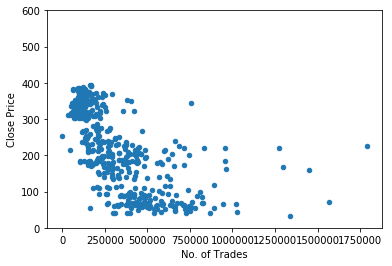

In [60]:
#scatter plot totalbsmtsf/saleprice

var = "No. of Trades"
df1 = pd.concat([df1['Close Price'], df1[var]], axis=1)
df1.plot.scatter(x=var, y='Close Price', ylim=(0,600))


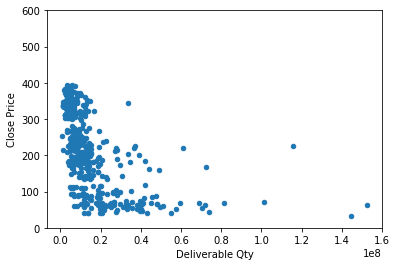

In [72]:

var = "Deliverable Qty"
df1 = pd.concat([df1['Close Price'], df1[var]], axis=1)
df1.plot.scatter(x=var, y='Close Price', ylim=(0,600))


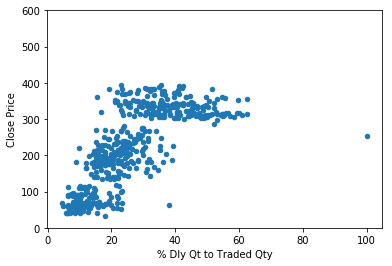

In [76]:
var = "% Dly Qt to Traded Qty"
df1 = pd.concat([df1['Close Price'], df1[var]], axis=1)
df1.plot.scatter(x=var, y='Close Price', ylim=(0,600))

Now , I’m creating a variable called forecast_out to store the number of days into the future that I want to predict.
 if I decide I only want to look 20 days into the future, I can simply change this variable from 30 to 20, and the program will predict now 20 days into the future.
    I also need a column (the target or dependent variable) that will hold the predicted price values 30 days into the future.The future price that I want that’s 30 days into the future is just 30 rows down from the current Adj.close price
    
    I will create a new column called ‘Prediction’ and populate it with data from the Adj. Close column but shifted 30 rows up to get the price of the next 30 days, and then print the last 5 rows of the new data set.
    Since I shifted the data up 30 rows, the last 30 rows of data for the new column ‘Prediction’ will be empty or contain the value ‘NaN’ 


In [89]:
# A variable for predicting 'n' days out into the future
forecast_out = 5 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Close Price']].shift(-forecast_out)
#print the new data set
print(df.tail())

     Close Price  Prediction
487        70.05         NaN
488        68.30         NaN
489        64.05         NaN
490        59.50         NaN
491        63.00         NaN


create the independent data set (X)This is the data set that i will use to train the machine learning model(s). To do this I will create a variable called ‘X’ , and convert the data into a numpy (np) array after dropping the ‘Prediction’ column, then store this new data into ‘X’.

Then I will remove the last 30 rows of data from ‘X’, and store the new data back into ‘X’. Last but not least I print the data.

In [90]:
### Create the independent data set (X)  #######
# Cont the dataframe to a numpy arverray
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[308.7 ]
 [306.45]
 [310.5 ]
 [312.7 ]
 [311.6 ]
 [306.8 ]
 [301.9 ]
 [303.9 ]
 [315.9 ]
 [311.15]
 [312.25]
 [311.7 ]
 [310.45]
 [310.15]
 [315.5 ]
 [315.15]
 [313.5 ]
 [315.15]
 [312.6 ]
 [311.65]
 [315.85]
 [317.1 ]
 [332.85]
 [333.6 ]
 [341.35]
 [339.8 ]
 [343.15]
 [340.9 ]
 [336.  ]
 [334.85]
 [342.4 ]
 [341.2 ]
 [349.35]
 [355.35]
 [359.55]
 [364.8 ]
 [361.6 ]
 [358.  ]
 [353.35]
 [354.4 ]
 [359.9 ]
 [349.05]
 [343.6 ]
 [338.75]
 [332.9 ]
 [335.  ]
 [325.55]
 [335.4 ]
 [320.35]
 [319.8 ]
 [311.8 ]
 [312.05]
 [308.7 ]
 [312.35]
 [316.1 ]
 [323.45]
 [326.15]
 [327.15]
 [322.3 ]
 [321.05]
 [312.95]
 [312.15]
 [311.95]
 [308.55]
 [303.25]
 [311.15]
 [312.8 ]
 [318.85]
 [311.85]
 [312.9 ]
 [304.8 ]
 [302.4 ]
 [300.75]
 [298.25]
 [286.65]
 [303.35]
 [303.5 ]
 [304.85]
 [306.25]
 [313.1 ]
 [305.45]
 [313.05]
 [314.5 ]
 [316.25]
 [319.25]
 [312.  ]
 [311.75]
 [309.55]
 [310.35]
 [307.9 ]
 [309.55]
 [318.5 ]
 [308.55]
 [313.05]
 [324.  ]
 [325.25]
 [352.4 ]
 [348.9 ]
 [362.  ]
 [354.25]


now I will create the dependent data set called ‘y’. This is the target data, the one that holds the future price predictions.
 create this new data set ‘y’, I will convert the data frame into a numpy array and from the ‘Prediction’ column, store it into a new variable called ‘y’ and then remove the last 30 rows of data from ‘y’. Then I will print ‘y’ to make sure their are no NaN’s.

In [91]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[306.8  301.9  303.9  315.9  311.15 312.25 311.7  310.45 310.15 315.5
 315.15 313.5  315.15 312.6  311.65 315.85 317.1  332.85 333.6  341.35
 339.8  343.15 340.9  336.   334.85 342.4  341.2  349.35 355.35 359.55
 364.8  361.6  358.   353.35 354.4  359.9  349.05 343.6  338.75 332.9
 335.   325.55 335.4  320.35 319.8  311.8  312.05 308.7  312.35 316.1
 323.45 326.15 327.15 322.3  321.05 312.95 312.15 311.95 308.55 303.25
 311.15 312.8  318.85 311.85 312.9  304.8  302.4  300.75 298.25 286.65
 303.35 303.5  304.85 306.25 313.1  305.45 313.05 314.5  316.25 319.25
 312.   311.75 309.55 310.35 307.9  309.55 318.5  308.55 313.05 324.
 325.25 352.4  348.9  362.   354.25 353.95 345.1  347.9  343.3  347.85
 344.65 350.25 344.8  345.75 349.75 345.3  345.5  334.15 334.7  333.7
 330.   339.4  345.2  338.05 343.15 346.2  342.7  342.95 336.75 339.15
 339.55 337.65 335.7  332.2  333.2  337.2  330.65 331.65 330.9  336.1
 332.95 335.1  334.15 335.95 335.6  329.3  339.65 337.05 336.9  335.55
 348.65 352.6

I can split them up into 80% training and 20 % testing data for the model(s).

In [93]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

can start creating and training the models 

test the model by getting the score also known as the coefficient of determination R² of the prediction. The best possible score is 1.0, and the model returns a score of 0.9274190417518909.

In [94]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Next I will create & train the Linear Regression model !

In [83]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9544450121420037


Let’s test the model by getting the score also known as the coefficient of determination R² of the prediction. The best possible score is 1.0, and the model returns a score of 0.9874918531515935.

In [84]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9900900067620345


 I am ready to do some forecasting / predictions. I will take the last 30 rows of data from the data frame of the Adj. Close price, and store it into a variable called x_forecast after transforming it into a numpy array and dropping the ‘Prediction’ column of course. Then I will print the data to make sure the 30 rows are all there.

In [86]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[63.]]


I have arrived at the moment of truth. I will print out the future price (next 30 days) predictions of Amazon stock using the linear regression model, and then print out the Amazon stock price predictions for te next 30 days of the support vector machine using the x_forecast data !

In [87]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print("Linear Prediction Result",lr_prediction)

print()
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print("SVM Prediction Result:",svm_prediction)

Linear Prediction Result [62.70246076]

SVM Prediction Result: [68.42980631]


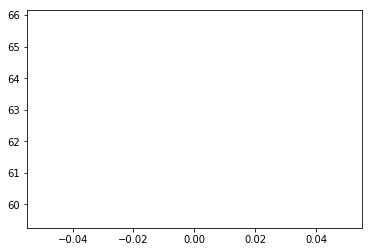

In [88]:
plt.plot(lr_prediction)


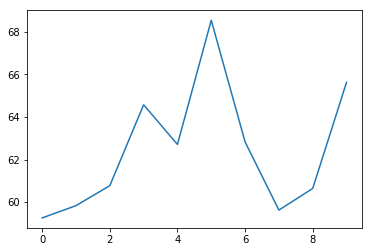

In [26]:
plt.plot(svm_prediction)